Training...

...ready!


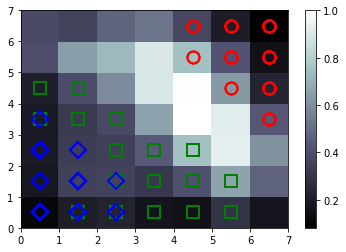

In [18]:
from minisom import MiniSom
from numpy import genfromtxt,array,linalg,zeros
from numpy import mean,std,apply_along_axis

"""
    This script shows how to use MiniSom on the Iris dataset.
    In partucular it shows how to train MiniSom and how to visualize
    the result.
    ATTENTION: matplotlib is required for the visualization.        
"""

# reading the iris dataset in the csv format    
# (downloaded from http://aima.cs.berkeley.edu/data/iris.csv)
data = genfromtxt('data/iris.csv', delimiter=',',usecols=(0,1,2,3))
data = apply_along_axis(lambda x: x/linalg.norm(x),1,data)
# data normalization

### Initialization and training ###
som = MiniSom(7,7,4,sigma=1.0,learning_rate=0.5)
som.random_weights_init(data)
print("Training...")
som.train_random(data,100) # random training
print("\n...ready!")

# Plotting the response for each pattern in the iris dataset
from matplotlib.pyplot import plot,axis,show,pcolor,colorbar,bone
%matplotlib inline
bone()
pcolor(som.distance_map().T) # plotting the distance map as background
colorbar()
target = genfromtxt('data/iris.csv',
                    delimiter=',',
                    usecols=(4),
                    dtype=str
                   ) # loading the labels
t = zeros(len(target),dtype=int)
t[target == 'setosa'] = 0
t[target == 'versicolor'] = 1
t[target == 'virginica'] = 2
# use different colors and markers for each label
markers = ['o','s','D']
colors = ['r','g','b']
for cnt,xx in enumerate(data):
    w = som.winner(xx) # getting the winner
    # palce a marker on the winning position for the sample xx
    plot(w[0]+.5,
         w[1]+.5,
         markers[t[cnt]],
         markerfacecolor='None',
         markeredgecolor=colors[t[cnt]],
         markersize=12,markeredgewidth=2)
axis([0,7,0,7])
show() # show the figure